In [1]:
import mne
import matplotlib.pyplot as plt

Creating RawArray with float64 data, n_channels=128, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


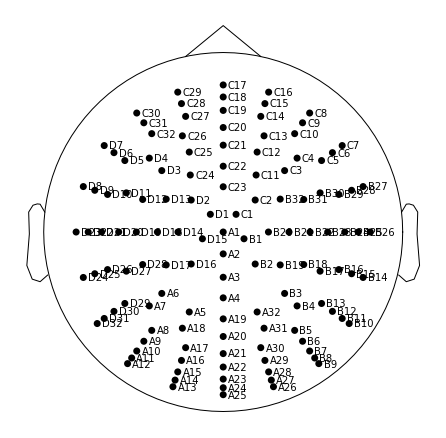

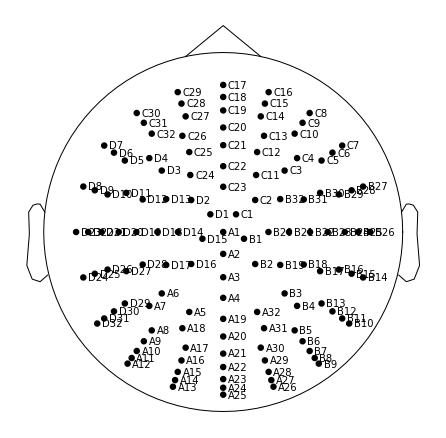

In [9]:
Adquisition_eq="biosemi128"
montage = mne.channels.make_standard_montage(Adquisition_eq)
montage.plot()

In [10]:
raw = mne.io.read_raw_bdf('./dataset/sub-01/ses-01/eeg/sub-01_ses-01_task-innerspeech_eeg.bdf', preload=True)

Extracting EDF parameters from /Users/lld/Documents/inner_speech_decoding/dataset/sub-01/ses-01/eeg/sub-01_ses-01_task-innerspeech_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1875967  =      0.000 ...  1831.999 secs...


Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1112 events found
Event IDs: [11 12 13 14 15 16 17 21 22 23 31 32 33 34 42 44 45 46 51 61 62 63 64]
Not setting metadata
Not setting metadata
1112 matching events found
Setting baseline interval to [-0.2001953125, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 200 events and 718 original time points ...
0 bad epochs dropped
Loading data for 127 events and 718 original time points ...
Loading data for 20 events and 718 original time points ...


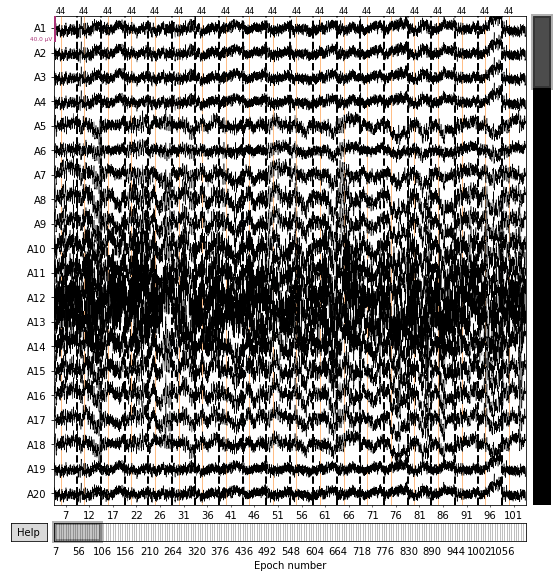

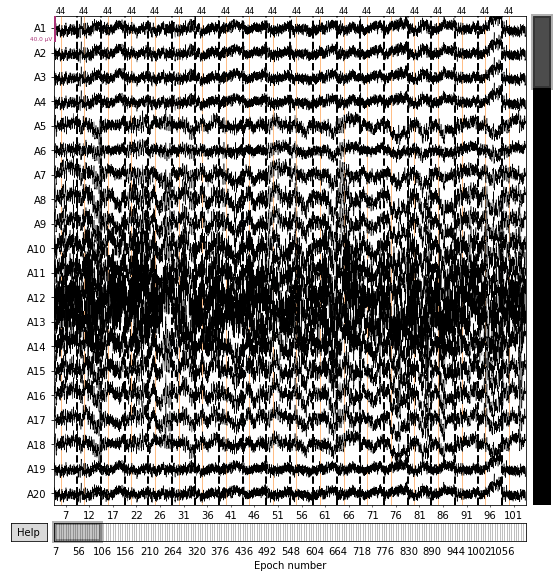

In [29]:
events = mne.find_events(raw)
epochs = mne.Epochs(raw, events)
event_dict = epochs.event_id
catch_trials_and_buttonpresses = mne.pick_events(events, include=[42, 44])
epochs['44'].plot(events=catch_trials_and_buttonpresses, event_id=event_dict)

In [11]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 136 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2019-08-20 10:57:41 UTC
 nchan: 137
 projs: []
 sfreq: 1024.0 Hz
>

In [12]:
len(raw.info['ch_names'])

137

In [13]:
events = mne.find_events(raw)

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1112 events found
Event IDs: [11 12 13 14 15 16 17 21 22 23 31 32 33 34 42 44 45 46 51 61 62 63 64]


In [14]:
annotations = mne.annotations_from_events(events, 1024.0)
raw.set_annotations(annotations)

<RawEDF | sub-01_ses-01_task-innerspeech_eeg.bdf, 137 x 1875968 (1832.0 s), ~1.91 GB, data loaded>

In [15]:
import numpy as np
data=dict()
y=dict()
for N_B in range(1,4):
    file_name = './dataset/derivatives/sub-01/ses-0'+ str(N_B) + '/sub-01_ses-0'+str(N_B)+'_events.dat'
    y[N_B] = np.load(file_name, allow_pickle=True)
            
            
    #  load data and events
    file_name = './dataset/derivatives/sub-01/ses-0'+ str(N_B) + '/sub-01_ses-0'+str(N_B)+'_eeg-epo.fif'
    X = mne.read_epochs(file_name,verbose='WARNING')
    data[N_B]= X._data

In [16]:
X.event_id

{'Arriba': 31, 'Abajo': 32, 'Derecha': 33, 'Izquierda': 34}

In [17]:
catch_trials_and_buttonpresses = mne.pick_events(events, include=[31,32])

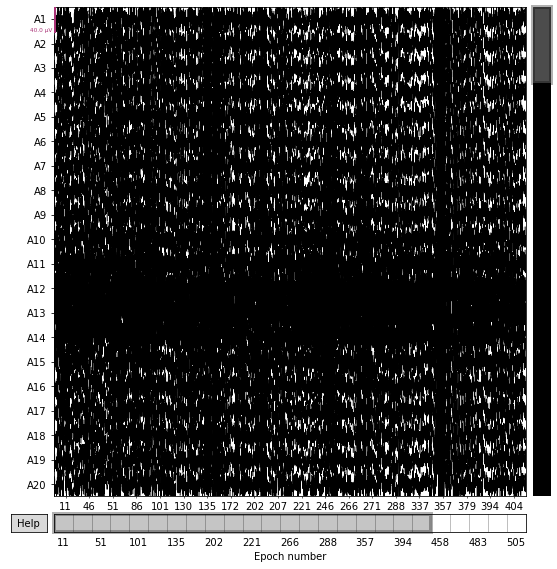

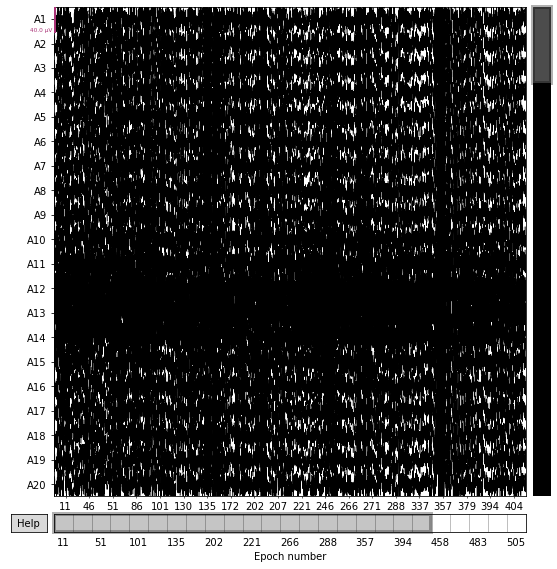

In [21]:
#import ipywidgets as widgets
X['Arriba'].plot(events=catch_trials_and_buttonpresses, event_id=X.event_id,
                    event_color=dict(Abajo='red', Arriba='blue'))

RuntimeError: No valid channel positions found

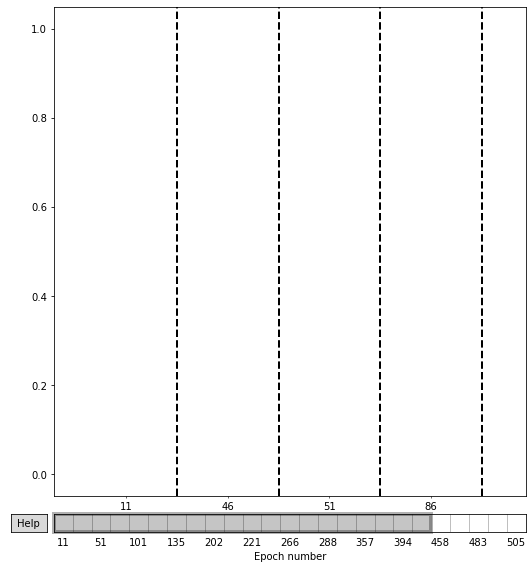

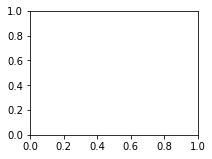

In [23]:

X['Arriba'].plot(events=catch_trials_and_buttonpresses, event_id=X.event_id,
                    event_color=dict(Abajo='red', Arriba='blue'),
                    group_by='position', butterfly=True)

In [40]:
for i in range(1,4):
    print(y[i].shape, data[i].shape)

(200, 4) (200, 128, 1153)
(200, 4) (200, 128, 1153)
(100, 4) (100, 128, 1153)


In [41]:
X = np.vstack((data.get(1),data.get(2),data.get(3))) 
Y = np.vstack((y.get(1),y.get(2),y.get(3))) 

In [42]:
X.shape, Y.shape

((500, 128, 1153), (500, 4))

In [43]:
Y

array([[ 39869,      3,      0,      1],
       [ 46491,      0,      0,      1],
       [ 53010,      3,      0,      1],
       ...,
       [904589,      1,      2,      3],
       [911381,      3,      2,      3],
       [917764,      3,      2,      3]])

In [46]:
raw = mne.io.read_raw_fif('./dataset/derivatives/sub-01/ses-0'+ str(1) + '/sub-01_ses-01_baseline-epo.fif', verbose=False).crop(tmax=120)



ValueError: No raw data in /Users/lld/Documents/inner_speech_decoding/dataset/derivatives/sub-01/ses-01/sub-01_ses-01_baseline-epo.fif